In [1]:
import pandas as pd

# Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [2]:
df = pd.read_csv('./momies_data/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
def rating_classification(rating):
    if rating <= 2:
        return "Низкий рейтинг"
    elif rating <= 4:
        return "Средний рейтинг"
    else:
        return "Высокий рейтинг"

In [4]:
df['class'] = df['rating'].apply(rating_classification)
df.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,Средний рейтинг
1,1,1029,3.0,1260759179,Средний рейтинг
2,1,1061,3.0,1260759182,Средний рейтинг
3,1,1129,2.0,1260759185,Низкий рейтинг
4,1,1172,4.0,1260759205,Средний рейтинг


# Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [5]:
df2 = pd.read_csv('./keywords.csv')
df2.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [6]:
def geo_classification(string):
    geo_data =  { 
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}
    for region, cities in geo_data.items():
        for city in cities:
            if city in string.lower():
                return region
    return "undefined"

In [7]:
df2['region'] = df2['keyword'].apply(geo_classification)

In [8]:
df2[df2['region'] != "undefined"]

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток
...,...,...,...
99590,авито ярославль автомобили с пробегом,3673,Центр
99634,северпост новости мурманской области,3606,Северо-Запад
99808,полармед мурманск запись на прием,3719,Северо-Запад
99890,яндекс метро москва,4548,Центр


# Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы <https://grouplens.org/datasets/movielens>). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

    1. для каждой строки пройдите по всем годам списка years
    2. если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

P/S/ все файлы находятся в архиве «дополнительные файлы к лекции и дз»

Важно! При копировании юпитер ноутбука изменяет кавычки ’ на ` , что может способствовать ошибки в коде. В данной ситуации необходимо их просто заменить.

In [9]:
df_movies = pd.read_csv('./movies_data/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Вариант с регуляркой, вынимающей год из скобок

In [19]:
import re 
def findyear(string):
    # ".*\((\d+)-?.*\)$" первый год из диапазона (xxxx-yyyy) -> xxxx
    # "\(*(\d+)\)$" второй год из диапазона -> yyyy
    
    string = string.strip()
    if re.findall(r'.*\((\d+)-?.*\)$', string):
        return int(re.findall(r'.*\((\d+)-?.*\)$', string)[-1])
    return 2016


In [20]:
%%time
df_movies['year'] = df_movies['title'].apply(findyear)

Wall time: 236 ms


### После поиска информации о фильмах, в которых год отстутствует, что они все 2016 и Hyena Road 2015 года выпусков. Следовательно изменим год на 2016

In [15]:
df_movies[df_movies['year'] == 1900]

,movieId,title,genres,year
9017,143410,Hyena Road,(no genres listed),1900
9063,151307,The Lovers and the Despot,(no genres listed),1900
9118,162376,Stranger Things,Drama,1900
9124,164979,"Women of '69, Unboxed",Documentary,1900


In [24]:
df_movies['year'].sort_values()

6119    1902
4968    1915
7058    1916
5073    1916
5438    1917
        ... 
9066    2016
9065    2016
9064    2016
9071    2016
9124    2016
Name: year, Length: 9125, dtype: int64

## Вариант 2. По алгоритму из задания, с некоторыми изменениями, основываясь на данных из файла

In [28]:
years = range(1900, 2017)
def findyear2(string):
    for year in years:
        if str(year) in string:
            return year
    return 2016
    

In [29]:
%%time
df_movies['year2'] = df_movies['title'].apply(findyear2)

Wall time: 383 ms


### Сравним различия в годах от двух методов 

In [30]:
df_movies[df_movies['year'] != df_movies['year2']]

,movieId,title,genres,year,year2
2153,2691,"Legend of 1900, The (a.k.a. The Legend of the ...",Drama,1998,1900
4999,7104,1941 (1979),Comedy|War,1979,1941
5525,8753,Unprecedented: The 2000 Presidential Election ...,Documentary,2002,2000
7519,77359,Red Riding: 1983 (2009),Crime|Drama|Mystery,2009,1983
8419,105254,Crystal Fairy & the Magical Cactus and 2012 (2...,Adventure|Comedy,2013,2012
8603,112062,Camille Claudel 1915 (2013),Drama,2013,1915
8671,114254,1971 (2014),Documentary,2014,1971


In [31]:
df_rating = pd.read_csv('./movies_data/ratings.csv')
df_rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [34]:
mean_rating = df_rating[['movieId', 'rating']].groupby('movieId').mean()
mean_rating.head()

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857


In [35]:
movie_rating = df_movies.merge(mean_rating, how='inner', on='movieId')[['movieId', 'title', 'rating', 'year', 'year2']]

In [36]:
movie_rating

,movieId,title,rating,year,year2
0,1,Toy Story (1995),3.872470,1995,1995
1,2,Jumanji (1995),3.401869,1995,1995
2,3,Grumpier Old Men (1995),3.161017,1995,1995
3,4,Waiting to Exhale (1995),2.384615,1995,1995
4,5,Father of the Bride Part II (1995),3.267857,1995,1995
...,...,...,...,...,...
9061,161944,The Last Brickmaker in America (2001),5.000000,2001,2001
9062,162376,Stranger Things,4.500000,2016,2016
9063,162542,Rustom (2016),5.000000,2016,2016
9064,162672,Mohenjo Daro (2016),3.000000,2016,2016


In [43]:
year_rating = movie_rating[['rating', 'year']].groupby('year').mean()
year2_rating = movie_rating[['rating', 'year2']].groupby('year2').mean()

year_rating.head()

,rating
year,
1902,4.333333
1915,3.000000
1916,3.500000
1917,4.250000
1918,4.250000


In [40]:
year_rating.sort_values(by='rating', ascending = False)

,rating
year,
1921,4.387500
1924,4.360000
1902,4.333333
1928,4.292143
1917,4.250000
...,...
2015,3.000008
1915,3.000000
1919,3.000000


## Визуализация данных

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

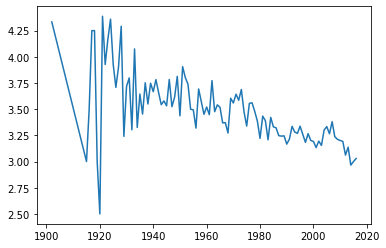

In [42]:
plt.plot(year_rating)

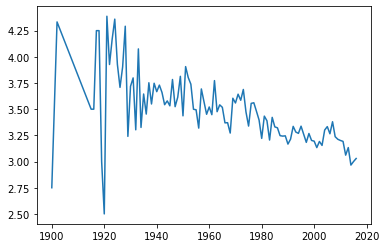

In [44]:
plt.plot(year2_rating)